In [1]:
#importing libraries
import pandas as pd
import numpy as np
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics,svm

import matplotlib.pyplot as plt0
import time

## TOTAL 18 Dataset (with Age and Sex)

In [2]:
t18 = pd.read_csv('total_18_data.csv')

In [3]:
t18.head()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
print(t18.shape)
t18.info()

(5875, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(2)
memory usage: 964.0 KB


## Objective 1 : Predicting total Updrs

In [5]:
dependent_variable = 'total_UPDRS'
independent = t18.columns.tolist()
independent.remove(dependent_variable)
independent

['age',
 'sex',
 'test_time',
 'motor_UPDRS',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [6]:
X =t18[independent].values
Y =t18.iloc[:, [4]].values

In [7]:
X.shape

(5875, 20)

In [8]:
Y

array([[34.398],
       [34.894],
       [35.389],
       ...,
       [32.495],
       [32.007],
       [31.513]])

In [9]:
 # load and summarize the dataset
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4112, 20) (4112, 1)
Test (1763, 20) (1763, 1)


# Feature Selection

Feature 0: 420.401660
Feature 1: 44.660826
Feature 2: 20.860318
Feature 3: 35435.818389
Feature 4: 21.757956
Feature 5: 19.069434
Feature 6: 16.588842
Feature 7: 15.512242
Feature 8: 16.602723
Feature 9: 37.284312
Feature 10: 40.993112
Feature 11: 29.392137
Feature 12: 30.425985
Feature 13: 62.226065
Feature 14: 29.391676
Feature 15: 16.294904
Feature 16: 113.889818
Feature 17: 100.870182
Feature 18: 59.913895
Feature 19: 101.257652


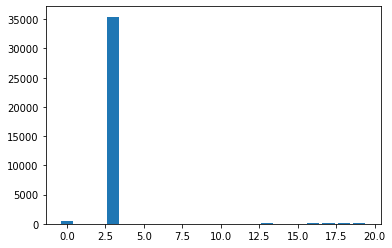

In [10]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train[:,0], X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [11]:
import seaborn as sns
t18.corr()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
age,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,0.010258,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,0.076703,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,-0.028876,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,0.072698,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,0.064027,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,0.984184,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,0.844630,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,1.000000,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,0.947203,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491
Jitter:DDP,0.010258,0.076703,-0.028876,0.072698,0.064027,0.984184,0.844630,1.000000,0.947203,1.000000,...,0.685556,0.650228,0.659833,0.603090,0.650227,0.792377,-0.641482,0.382886,0.214893,0.670660


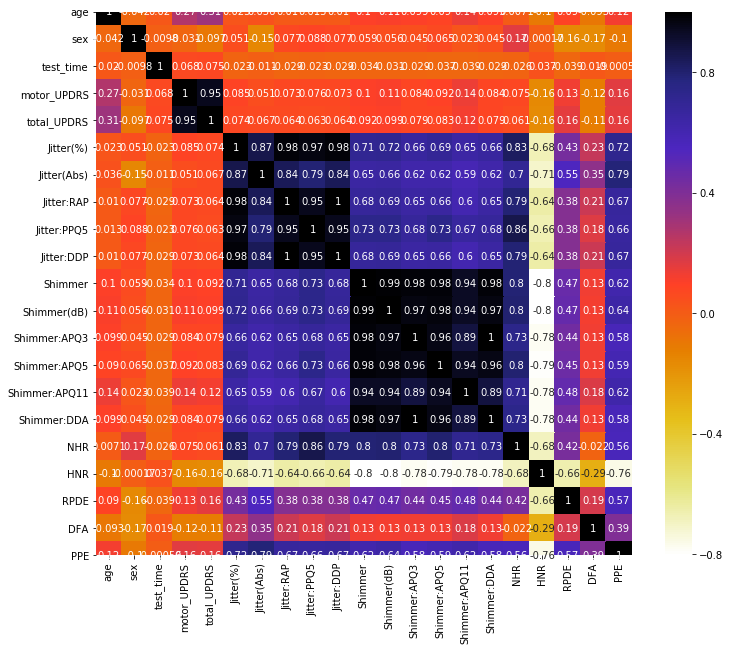

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = t18.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [13]:
#Correlation with output variable
cor_target = abs(cor['total_UPDRS'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

age              0.310290
motor_UPDRS      0.947231
total_UPDRS      1.000000
Shimmer:APQ11    0.120838
HNR              0.162117
RPDE             0.156897
DFA              0.113475
PPE              0.156195
Name: total_UPDRS, dtype: float64

## Model Training

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestRegressor
clf1=RandomForestRegressor(n_estimators=500, n_jobs=-1, max_depth=2000, max_leaf_nodes=2350)

from sklearn.svm import SVR
clf2 = SVR(kernel = 'rbf')

from sklearn.linear_model import LinearRegression
clf3 = LinearRegression()

clf1.fit(X_train, y_train)
print("Done")
clf2.fit(X_train, y_train)
print("Done")
clf3.fit(X_train, y_train)
print("Done")



pred_RandomForest=clf1.predict(X_test)
pred_LinearRegression=clf2.predict(X_test)
pred_SVR=clf3.predict(X_test)

C:\Users\NIKHIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Done


C:\Users\NIKHIL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done
Done


In [17]:
score1 = metrics.r2_score(y_test, pred_RandomForest)
MSE1 = np.square(np.subtract(y_test,pred_RandomForest)).mean() 
RMSE1 = math.sqrt(MSE1)


score2 = metrics.r2_score(y_test, pred_LinearRegression)
MSE2 = np.square(np.subtract(y_test,pred_LinearRegression)).mean() 
RMSE2 = math.sqrt(MSE2)

score3 = metrics.r2_score(y_test, pred_SVR)
MSE3 = np.square(np.subtract(y_test,pred_SVR)).mean() 
RMSE3 = math.sqrt(MSE3)

In [18]:
data = {'R2_Score':[score1, score2, score3], 'MSE':[MSE1, MSE2, MSE3], 'RMSE':[RMSE1, RMSE2, RMSE3]}    
RES = pd.DataFrame(data, index =['RANDOMFOREST', 'LINEAR REGRESSION', 'SVR'])   
RES  

,R2_Score,MSE,RMSE
RANDOMFOREST,0.998421,215.296260,14.672977
LINEAR REGRESSION,0.913732,201.072613,14.180008
SVR,0.900371,10.748262,3.278454


## Total 16 Dataset (without Age and Sex)

# Predict total Updrs

In [19]:
t16 = pd.read_csv('total_16_data.csv')

In [20]:
t16.describe()

,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [21]:
t16.head()

,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [22]:
t16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 19 columns):
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19)
memory usage: 872.2 KB


In [23]:
dependent_variable = 'total_UPDRS'
independent = t16.columns.tolist()
independent.remove(dependent_variable)
independent

['test_time',
 'motor_UPDRS',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [24]:
X =t16[independent].values
Y =t16.iloc[:, [2]].values

In [25]:
X.shape

(5875, 18)

In [26]:
Y

array([[34.398],
       [34.894],
       [35.389],
       ...,
       [32.495],
       [32.007],
       [31.513]])

In [27]:
# load and summarize the dataset
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4112, 18) (4112, 1)
Test (1763, 18) (1763, 1)


# Feature Selection

Feature 0: 20.860318
Feature 1: 35435.818389
Feature 2: 21.757956
Feature 3: 19.069434
Feature 4: 16.588842
Feature 5: 15.512242
Feature 6: 16.602723
Feature 7: 37.284312
Feature 8: 40.993112
Feature 9: 29.392137
Feature 10: 30.425985
Feature 11: 62.226065
Feature 12: 29.391676
Feature 13: 16.294904
Feature 14: 113.889818
Feature 15: 100.870182
Feature 16: 59.913895
Feature 17: 101.257652


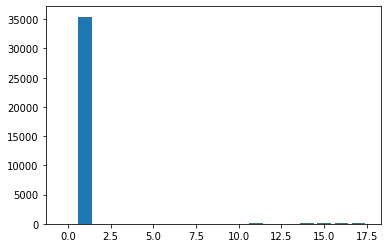

In [28]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train[:,0], X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

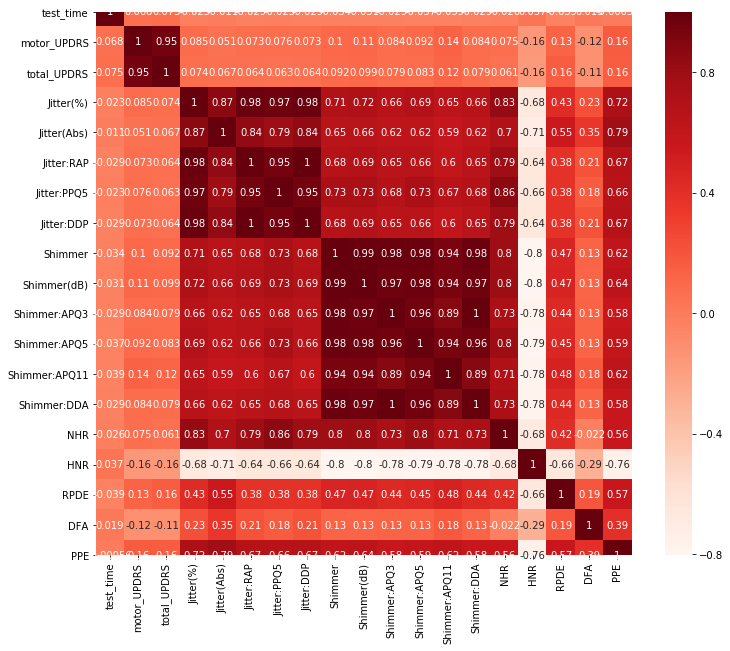

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = t16.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [30]:
#Correlation with output variable
cor_target = abs(cor['total_UPDRS'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

motor_UPDRS      0.947231
total_UPDRS      1.000000
Shimmer:APQ11    0.120838
HNR              0.162117
RPDE             0.156897
DFA              0.113475
PPE              0.156195
Name: total_UPDRS, dtype: float64

# Training Model

In [31]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestRegressor
clf1=RandomForestRegressor(n_estimators=500, n_jobs=-1, max_depth=2000, max_leaf_nodes=2350)

from sklearn.svm import SVR
clf2 = SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

from sklearn.linear_model import LinearRegression
clf3 = LinearRegression()

clf1.fit(X_train, y_train)
print("Done")
clf2.fit(X_train, y_train)
print("Done")
clf3.fit(X_train, y_train)
print("Done")



pred_RandomForest=clf1.predict(X_test)
pred_LinearRegression=clf3.predict(X_test)
pred_SVR=clf2.predict(X_test)

C:\Users\NIKHIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Done


C:\Users\NIKHIL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done
Done


In [40]:
score1 = metrics.r2_score(y_test, pred_RandomForest)
MSE1 = np.square(np.subtract(y_test,pred_RandomForest)).mean() 
RMSE1 = math.sqrt(MSE1)

score2 = metrics.r2_score(y_test, pred_LinearRegression)
MSE2 = np.square(np.subtract(y_test,pred_LinearRegression)).mean() 
RMSE2 = math.sqrt(MSE2)

score3 = metrics.r2_score(y_test, pred_SVR)
MSE3 = np.square(np.subtract(y_test,pred_SVR)).mean() 
RMSE3 = math.sqrt(MSE3)

In [41]:
data = {'R2_Score':[score1, score2, score3], 'MSE':[MSE1, MSE2, MSE3], 'RMSE':[RMSE1, RMSE2, RMSE3]}    
RES = pd.DataFrame(data, index =['RANDOMFOREST', 'LINEAR REGRESSION', 'SVR'])   
RES


,R2_Score,MSE,RMSE
RANDOMFOREST,0.985213,212.771243,14.586680
LINEAR REGRESSION,0.896880,11.124899,3.335401
SVR,0.952719,210.005070,14.491552
